<a href="https://colab.research.google.com/github/r-ap/TrainingMachineLearning/blob/main/BFI_PYIM_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D4AM%20-%20KNN%20%26%20Naive%20Bayes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, stratify=y)

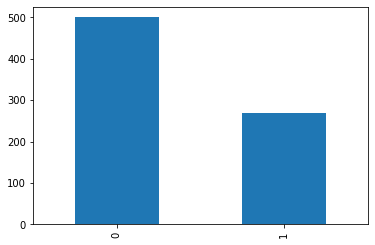

In [ ]:
y.value_counts().plot(kind='bar')

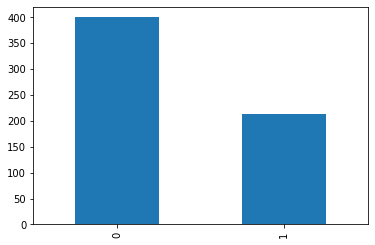

In [ ]:
y_train.value_counts().plot(kind='bar')

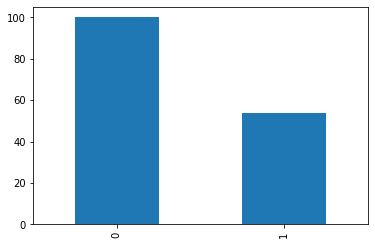

In [ ]:
y_test.value_counts().plot(kind='bar')

### Resampling

- Undersample
- Oversample (SMOTE)

In [ ]:
y_train_0 = y_train[y_train==0]
y_train_1 = y_train[y_train==1]

y_train_0_sample = y_train_0.sample(len(y_train_1))
y_train_sample = pd.concat([y_train_0_sample,y_train_1]).sample(2*len(y_train_1))
y_train_sample

422    0
546    1
519    0
138    0
411    0
      ..
463    0
379    0
119    0
276    1
214    1
Name: Outcome, Length: 428, dtype: int64

In [ ]:
X_train_sample = X_train.loc[y_train_sample.index]

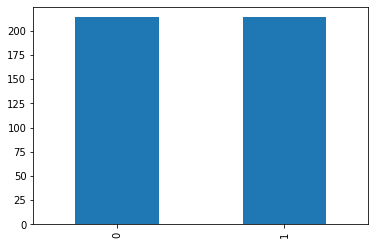

In [ ]:
y_train_sample.value_counts().plot(kind='bar')

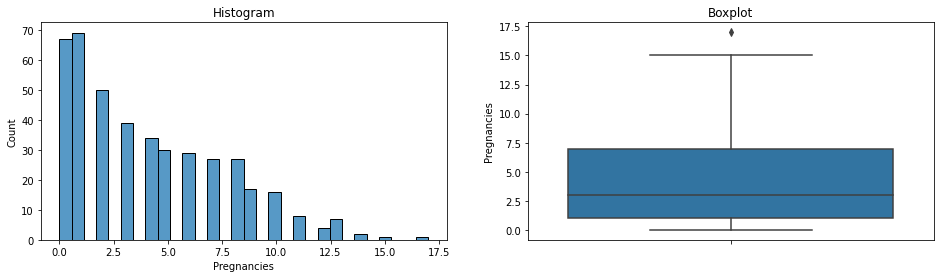

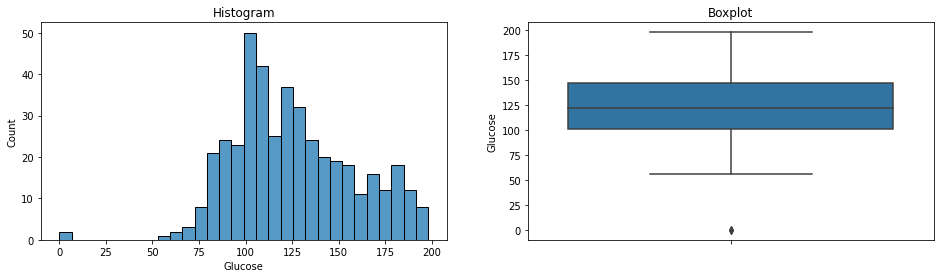

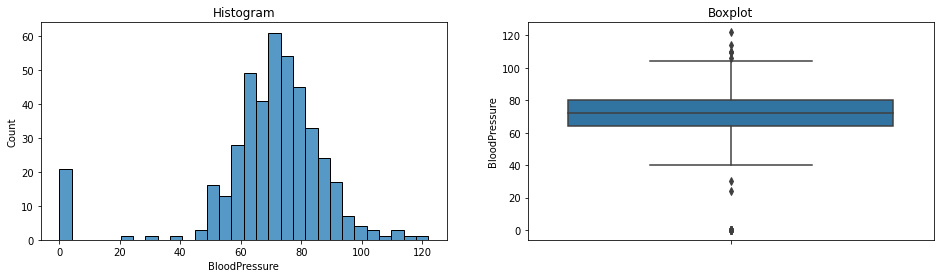

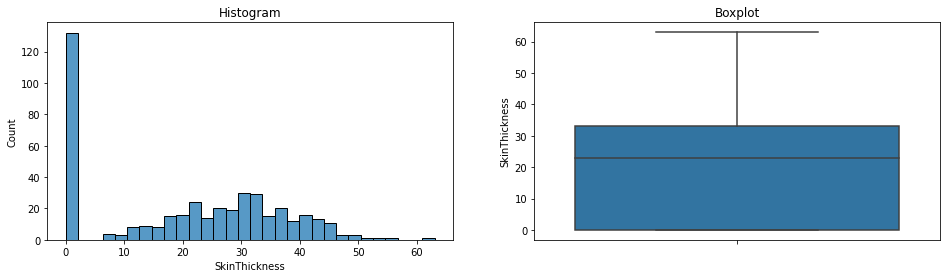

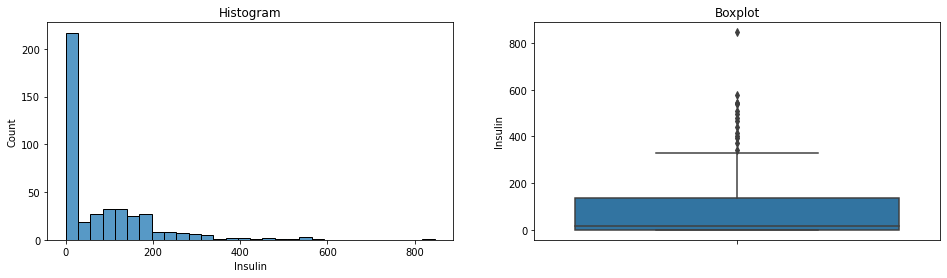

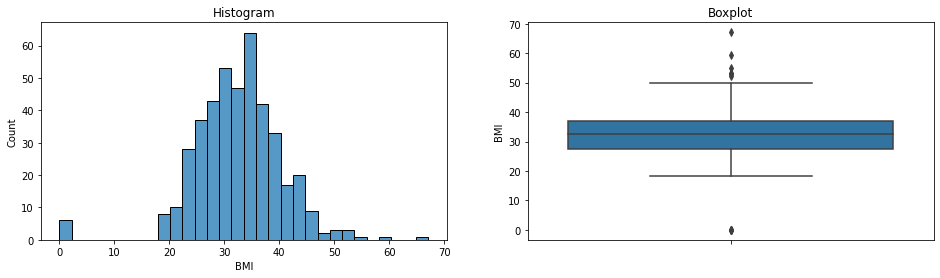

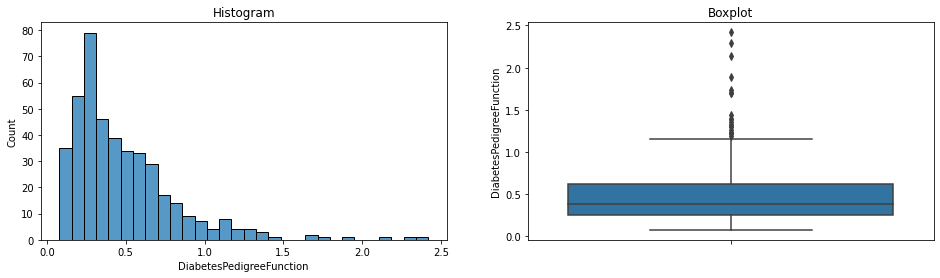

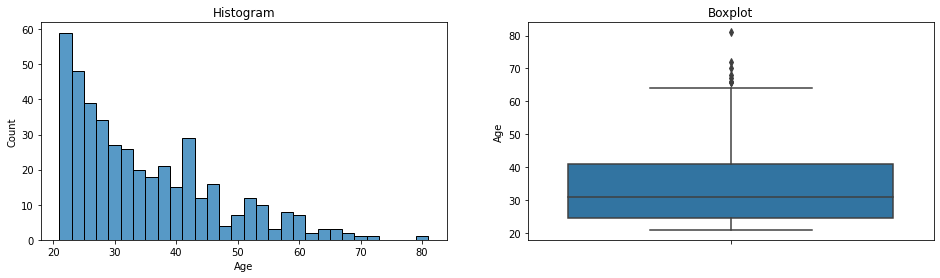

In [ ]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

for col in X_train_sample.columns:
  diagnostic_plots(X_train_sample, col)

In [ ]:
X_train_samp = X_train_sample[(X_train_sample['BMI']>0) & (X_train_sample['BloodPressure']>0) & (X_train_sample['Glucose']>0)]
y_train_samp = y_train_sample.loc[X_train_samp.index]

In [ ]:
for col in X_train_samp:
  print(f"{col} skewness: {X_train_samp[col].skew()}")

Pregnancies skewness: 0.8198459311937266
Glucose skewness: 0.4216491645810772
BloodPressure skewness: 0.24564765906474811
SkinThickness skewness: -0.10757189165266366
Insulin skewness: 2.0857056026272747
BMI skewness: 0.6863800331749683
DiabetesPedigreeFunction skewness: 2.022209801242754
Age skewness: 0.9818709446717292


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_samp)
X_train_scaled = scaler.transform(X_train_samp)
X_test_scaled = scaler.transform(X_test)

# Model

## Logistic Regression

- Model klasifikasi yang berbasis linear regression dimana hasil dari model linear di-input ke fungsi sigmoid untuk ditentukan penentuan kelasnya

<img src="https://studymachinelearning.com/wp-content/uploads/2019/09/sigmoid_graph.png"></img>

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty="l2", C = 1, solver="lbfgs")

logreg.fit(X_train_scaled,y_train_samp)

y_pred_train_lr = logreg.predict(X_train_scaled)
y_pred_test_lr = logreg.predict(X_test_scaled)

y_proba_train_lr = logreg.predict_proba(X_train_scaled)
y_proba_test_lr = logreg.predict_proba(X_test_scaled)

## KNN

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png"></img>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(X_train_scaled,y_train_samp)

y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)

y_proba_train_knn = knn.predict_proba(X_train_scaled)
y_proba_test_knn = knn.predict_proba(X_test_scaled)

## SVM

<img src="https://miro.medium.com/max/662/0*rIGWbxfCPvxr_cz1"></img>

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=0.1, probability=True)

svm.fit(X_train_scaled,y_train_samp)

y_pred_train_svm = svm.predict(X_train_scaled)
y_pred_test_svm = svm.predict(X_test_scaled)

y_proba_train_svm = svm.predict_proba(X_train_scaled)
y_proba_test_svm = svm.predict_proba(X_test_scaled)

## Decision Tree

<img src="https://lh4.googleusercontent.com/6SkO8uQBp3S5mpdXrnPaJUjnWpui1Qypt_erbfzjEOQ21HYD41_bGQ-tcOnN72cPa_OKaPBsH43TBSGTSLJ7HThUO4UJwaeeAK-cpFJwaNoXx-zob01tx1-Oy8IrXVT02CbfzQ"></img>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_split=2, min_samples_leaf=1)

DT.fit(X_train_samp,y_train_samp)

y_pred_train_dt = DT.predict(X_train_samp)
y_pred_test_dt = DT.predict(X_test)

y_proba_train_dt = DT.predict_proba(X_train_samp)
y_proba_test_dt = DT.predict_proba(X_test)

## Ensemble Learning (Random Forest)

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg"></img>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=5, min_samples_split=2, min_samples_leaf=1)

RF.fit(X_train_samp,y_train_samp)

y_pred_train_rf = RF.predict(X_train_samp)
y_pred_test_rf = RF.predict(X_test)

y_proba_train_rf = RF.predict_proba(X_train_samp)
y_proba_test_rf = RF.predict_proba(X_test)

# Model Evaluasi

- Akurasi
- Precision
- Recall
- F1 Score
- ROC AUC Score

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

**Logistic Regression**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_lr))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_lr[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_lr))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_lr[:,1]))

Training
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       205
           1       0.77      0.71      0.74       198

    accuracy                           0.75       403
   macro avg       0.76      0.75      0.75       403
weighted avg       0.76      0.75      0.75       403

ROC AUC Score: 0.8574772111357476


Test
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.65      0.72      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154

ROC AUC Score: 0.8392592592592593


**KNN**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_knn))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_knn[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_knn))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_knn[:,1]))

Training
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       205
           1       0.83      0.81      0.82       198

    accuracy                           0.83       403
   macro avg       0.83      0.83      0.83       403
weighted avg       0.83      0.83      0.83       403

ROC AUC Score: 0.9063932002956393


Test
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       100
           1       0.65      0.69      0.67        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

ROC AUC Score: 0.805


**SVM**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_svm))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_svm[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_svm))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_svm[:,1]))

Training
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       205
           1       0.75      0.79      0.77       198

    accuracy                           0.77       403
   macro avg       0.77      0.77      0.77       403
weighted avg       0.77      0.77      0.77       403

ROC AUC Score: 0.8532150776053216


Test
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       100
           1       0.61      0.78      0.68        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.75      0.75       154

ROC AUC Score: 0.8262962962962963


**Decision Tree**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_dt))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_dt[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_dt))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_dt[:,1]))

Training
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       205
           1       0.83      0.94      0.88       198

    accuracy                           0.88       403
   macro avg       0.88      0.88      0.88       403
weighted avg       0.88      0.88      0.88       403

ROC AUC Score: 0.9374846021187484


Test
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       100
           1       0.61      0.78      0.68        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.75      0.75       154

ROC AUC Score: 0.7657407407407407


**Random Forest**

In [ ]:
print("Training")
print(classification_report(y_train_samp,y_pred_train_rf))
print('ROC AUC Score:',roc_auc_score(y_train_samp,y_proba_train_rf[:,1]))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,y_pred_test_rf))
print('ROC AUC Score:',roc_auc_score(y_test,y_proba_test_rf[:,1]))

Training
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       205
           1       0.85      0.90      0.88       198

    accuracy                           0.88       403
   macro avg       0.88      0.88      0.88       403
weighted avg       0.88      0.88      0.88       403

ROC AUC Score: 0.9607046070460705


Test
              precision    recall  f1-score   support

           0       0.87      0.77      0.81       100
           1       0.65      0.78      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154

ROC AUC Score: 0.8364814814814814
